In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msn
import dexplot as dxp

In [2]:
import numpy as np
from scipy.stats import spearmanr

In [3]:

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb

In [4]:
train=pd.read_csv("training_set_VU_DM.csv")
#test=pd.read_csv("test_set_VU_DM.csv")


In [5]:
to_drop= ['comp1_rate',
'comp1_inv',
'comp1_rate_percent_diff',
'comp2_rate',
'comp2_inv',
'comp2_rate_percent_diff',
'comp3_rate',
'comp3_inv',
'comp3_rate_percent_diff',
'comp4_rate',
'comp4_inv',
'comp4_rate_percent_diff',
'comp5_rate',
'comp5_inv',
'comp5_rate_percent_diff',
'comp6_rate',
'comp6_inv',
'comp6_rate_percent_diff',
'comp7_rate',
'comp7_inv',
'comp7_rate_percent_diff',
'comp8_rate',
'comp8_inv',
'comp8_rate_percent_diff'

]

#train['outcome'] = pd.Series(train['booking_bool']> 0, 500 + train['position'] , train['click_bool']> 0, 100 +train['position'] , 0 + train['position'] )

conditions = [
    #(train['booking_bool']> 0),
    (train['click_bool']> 0)
]

#choices = [500+(40 - train['position']) ,100+(40 - train['position'])]
#train['outcome'] = np.select(conditions, choices, default=(40 - train['position'])

#choices = [2 ,1]
choices = [1]
train['outcome'] = np.select(conditions, choices, default=0)

train_reduced  = train.drop(to_drop,  axis=1)#.sample(frac=0.2, replace=True, random_state=1)
#test_reduced  = test.iloc[: , :N].sample(frac=0.33, replace=True, random_state=1)

In [6]:
train_reduced['hotel_click_prob'] = train_reduced.groupby('prop_id')['click_bool'].transform('sum') / train_reduced.groupby('prop_id')['click_bool'].transform('count')
pd.crosstab(train_reduced.hotel_click_prob, train_reduced.prop_id, dropna=False)



prop_id,1,2,3,4,5,6,7,8,9,10,...,140812,140813,140814,140815,140816,140817,140818,140819,140820,140821
hotel_click_prob,,,,,,,,,,,,,,,,,,,,,
0.000000,0,0,0,0,0,0,7,5,17,2,...,0,28,8,0,0,3,3,2,18,0
0.001892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.001894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.002558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.002597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.800000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.833333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.857143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_reduced['hotel_buy_prob'] = train_reduced.groupby('prop_id')['booking_bool'].transform('sum') / train_reduced.groupby('prop_id')['booking_bool'].transform('count')
pd.crosstab(train_reduced.hotel_buy_prob, train_reduced.prop_id, dropna=False)


prop_id,1,2,3,4,5,6,7,8,9,10,...,140812,140813,140814,140815,140816,140817,140818,140819,140820,140821
hotel_buy_prob,,,,,,,,,,,,,,,,,,,,,
0.000000,61,0,0,0,30,10,7,5,17,2,...,19,28,8,111,0,3,3,2,18,0
0.000946,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.001117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.001595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.001621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.750000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.785714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.800000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train['outcome'].value_counts()


0    4736468
1     221879
Name: outcome, dtype: int64

In [9]:
train_reduced = train_reduced.groupby('outcome')
train_reduced = pd.DataFrame(train_reduced.apply(lambda x: x.sample(train_reduced.size().min()).reset_index(drop=True)))

In [10]:
# conditions = [
#     (train['booking_bool']> 0),
#     (train['click_bool']> 0)
# ]

# choices = [500+train['position'],100+train['position'], train['position']]
# train['outcome'] = np.select(conditions, choices, default=train['position'])

In [11]:
train_reduced.isnull().mean() * 100

srch_id                         0.000000
date_time                       0.000000
site_id                         0.000000
visitor_location_country_id     0.000000
visitor_hist_starrating        94.938457
visitor_hist_adr_usd           94.913669
prop_country_id                 0.000000
prop_id                         0.000000
prop_starrating                 0.000000
prop_review_score               0.127772
prop_brand_bool                 0.000000
prop_location_score1            0.000000
prop_location_score2           17.163860
prop_log_historical_price       0.000000
position                        0.000000
price_usd                       0.000000
promotion_flag                  0.000000
srch_destination_id             0.000000
srch_length_of_stay             0.000000
srch_booking_window             0.000000
srch_adults_count               0.000000
srch_children_count             0.000000
srch_room_count                 0.000000
srch_saturday_night_bool        0.000000
srch_query_affin

<AxesSubplot:>

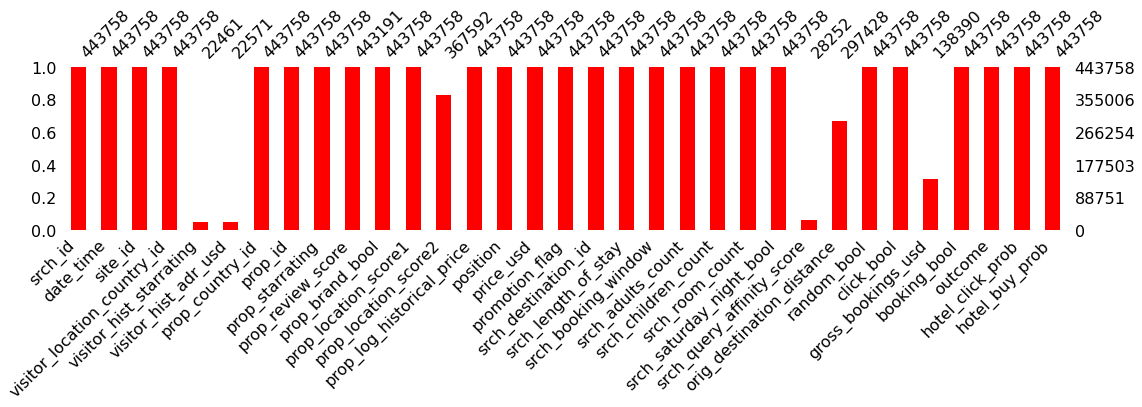

In [12]:
msn.bar(train_reduced,figsize=(18,3), color='red')

<AxesSubplot:>

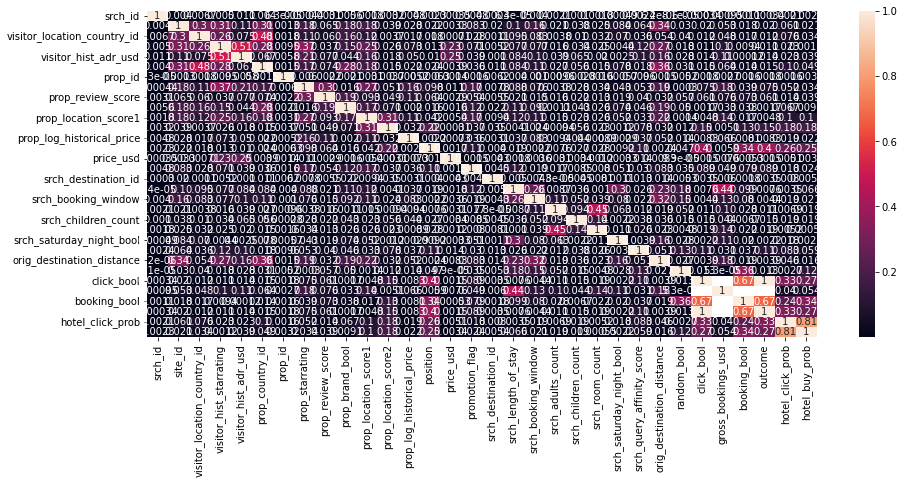

In [13]:
plt.figure(figsize=(15, 6))
sns.heatmap(train_reduced.corr().abs(),  annot=True)

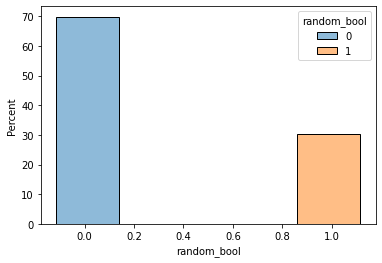

In [14]:
#ax = sns.histplot(x = train_reduced['random_bool'], hue=train_reduced['random_bool'], multiple="dodge", 
#train_reduced = train_reduced.reset_index()
ax = sns.histplot(x = train_reduced['random_bool'], hue=train_reduced['random_bool'] ,
                  stat = 'percent', shrink =10, common_norm=True)

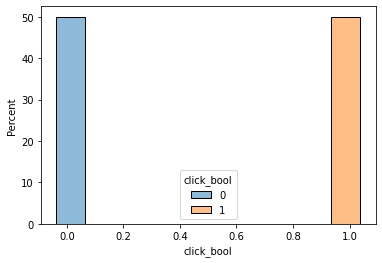

In [15]:
#ax = sns.histplot(x = train_reduced['random_bool'], hue=train_reduced['random_bool'], multiple="dodge", 
#train_reduced = train_reduced.reset_index()
ax = sns.histplot(x = train_reduced['click_bool'], hue=train_reduced['click_bool'] ,
                  stat = 'percent', shrink =4,common_norm=True)

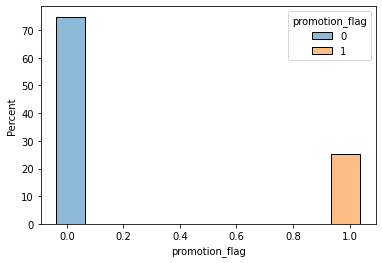

In [16]:
#ax = sns.histplot(x = train_reduced['random_bool'], hue=train_reduced['random_bool'], multiple="dodge", 
#train_reduced = train_reduced.reset_index()
ax = sns.histplot(x = train_reduced['promotion_flag'], hue=train_reduced['promotion_flag'] ,
                  stat = 'percent', shrink =4,common_norm=True)

In [17]:
# train_reduced['bought_flag'] = np.where(train_reduced['gross_bookings_usd']> 0, 1, 0)

# ax = sns.histplot(x = train_reduced['bought_flag'], hue=train_reduced['bought_flag'] ,
#                   stat = 'percent', shrink =4,common_norm=True)


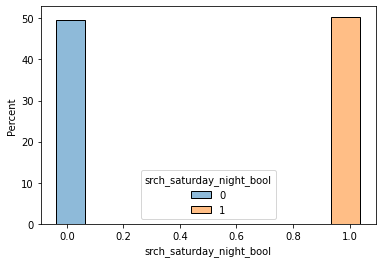

In [18]:


ax = sns.histplot(x = train_reduced['srch_saturday_night_bool'], hue=train_reduced['srch_saturday_night_bool'] ,
                  stat = 'percent', shrink =4,common_norm=True)


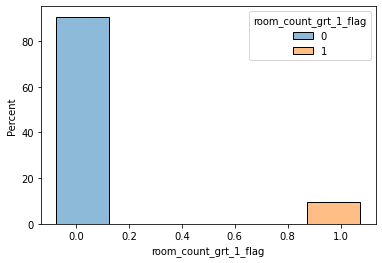

In [19]:
train_reduced['room_count_grt_1_flag'] = np.where(train_reduced['srch_room_count']> 1, 1, 0)

ax = sns.histplot(x = train_reduced['room_count_grt_1_flag'], hue=train_reduced['room_count_grt_1_flag'] ,
                  stat = 'percent', shrink =4,common_norm=True)

In [20]:
# df = train_reduced.loc[(train_reduced['gross_bookings_usd'] >= 0) & (train_reduced['gross_bookings_usd'] <= 1000)]
# sns.kdeplot(df['gross_bookings_usd'])
# plt.show()

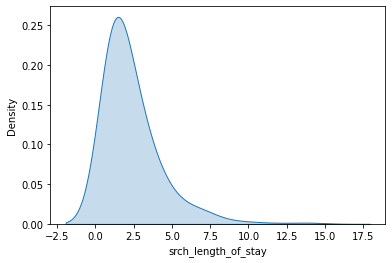

In [21]:
df = train_reduced.loc[(train_reduced['srch_length_of_stay'] >= 0) & (train_reduced['srch_length_of_stay'] <= 15)]
sns.kdeplot(df['srch_length_of_stay'], shade=True, bw_adjust=7)
plt.show()

In [22]:
train_reduced = train_reduced.loc[(train_reduced['random_bool'] == 0)]

In [23]:
to_drop = ['srch_id','site_id', 'date_time', 'visitor_location_country_id', 'prop_country_id', 'prop_id', 'prop_brand_bool', 'orig_destination_distance', 'click_bool', 'room_count_grt_1_flag', 'random_bool', 'booking_bool', 'srch_destination_id', 'position', 'prop_location_score2'
          ,'gross_bookings_usd'] 

train1 = train_reduced.drop(to_drop,  axis=1)

<AxesSubplot:>

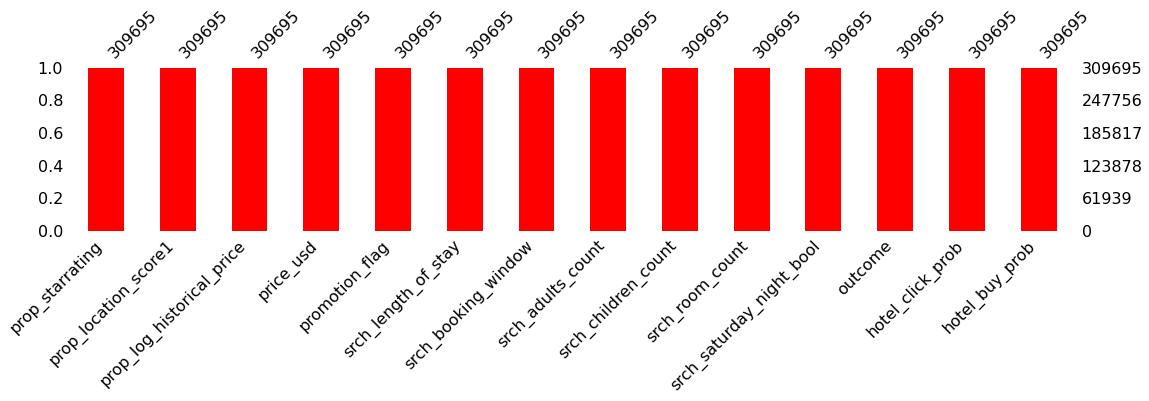

In [24]:
train1=train1.dropna(axis=1,how="any")
msn.bar(train1,figsize=(18,3), color='red')

In [38]:
train1 = train1[['prop_starrating', 'prop_location_score1','prop_log_historical_price','price_usd','promotion_flag','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool', 'hotel_click_prob', 'hotel_buy_prob','outcome']]

In [39]:
#train1.reset_index()
X = train1.iloc[:, :-1].values
y = train1.iloc[:, -1].values

In [40]:
train1.head(20)



prop_starrating  prop_location_score1  prop_log_historical_price  \
outcome                                                                        
0       1                 3                  3.09                       4.40   
        3                 4                  3.87                       4.68   
        4                 4                  1.39                       0.00   
        5                 3                  1.95                       4.97   
        7                 2                  1.79                       4.62   
        8                 4                  1.95                       4.98   
        11                3                  0.69                       4.97   
        12                4                  5.90                       5.84   
        13                4                  2.20                       5.37   
        14                4                  4.56                       4.03   
        15                4                  3.43                       5.02   
        17                2                  1.39                       4.62   
        19                3                  1.95                       4.88   
        20                2                  2.48                       4.38   
        22                2                  1.10                       4.39   
        23                4                  4.22                       5.12   
        25                4                  5.07                       5.22   
        26                3                  2.48                       5.33   
        27                4                  3.91                       0.00   
        29                4                  4.38                       5.36   

            price_usd  promotion_flag  srch_length_of_stay  \
outcome                                                      
0       1       67.00               0                    3   
        3       81.07               0                    2   
        4      295.73               0                    1   
        5      161.00               0                    1   
        7       59.00               1                    6   
        8      109.00               0                    2   
        11     155.93               0                    2   
        12     199.00               0                    1   
        13      78.76               0                    1   
        14      34.03               1                    4   
        15     112.77               1                   14   
        17      52.00               0                    1   
        19      95.00               0                    2   
        20      85.00               0                    3   
        22      80.00               0                    1   
        23     155.00               0                    1   
        25     149.00               1                    3   
        26     259.00               0                    2   
        27      88.09               0                    3   
        29     239.00               0                    2   

            srch_booking_window  srch_adults_count  srch_children_count  \
outcome                                                                   
0       1                     1                  4                    1   
        3                     5                  1                    0   
        4                     4                  2                    1   
        5                    29                  2                    0   
        7                    56                  2                    0   
        8                     1                  2                    0   
        11                   24                  1                    2   
        12                    0                  1                    0   
        13                   29                  3                    0   
        14                   13                  1           

In [41]:
models_list=[
    LogisticRegression(),
  #  Lasso(),
   # RandomForestClassifier(criterion='entropy', min_samples_leaf=60,
             #          min_samples_split=4, random_state=16),
    #GradientBoostingClassifier(),
    lgb.LGBMClassifier(),
   # LinearSVC(random_state=42, C=0.01),
    #xgb.XGBRegressor(objective="reg:linear", random_state=42)   
  #  xgb.XGBClassifier(objective="binary:logistic", random_state=0, eval_metric="auc", n_estimators=100, max_depth=6,learning_rate=0.1), 
 #   xgb.XGBClassifier(objective="binary:logistic", random_state=0, eval_metric="auc", n_estimators=100, max_depth=6,learning_rate=0.05), #better. 
  #  xgb.XGBClassifier(objective="binary:logistic", random_state=0, eval_metric="auc", n_estimators=100, max_depth=6,learning_rate=0.01), 
    #  "multi:softprob"
]

In [42]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [43]:
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
import warnings
warnings.filterwarnings('ignore')

l=[]
for model in models_list:
    #clf=clf_models(model)
    print(model)
    fit_model=model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    print("model score: %.3f" % score)
    l.append([model,'clf', score, X_test, y_test])
    #print(clf)
    #scores = -1 * cross_val_score(clf, X, y,cv=5,scoring='neg_mean_absolute_error')
    #print("MAE scores:\n", scores.mean(), scores.sum(), scores.min())
    
#print(l[3][4])
#print(l[2][3])
#print(l[2][0])

LogisticRegression()
model score: 0.496
LGBMClassifier()
model score: 0.701
LinearSVC(C=0.01, random_state=42)
model score: 0.671


In [44]:
y_pred=l[1][0].predict(X_test)

print(y_pred)

y_pred[:5]

[1 0 0 ... 1 1 0]


array([1, 0, 0, 1, 1])

In [45]:
predictors = ['prop_starrating', 'prop_location_score1','prop_log_historical_price','price_usd','promotion_flag','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool', 'hotel_click_prob', 'hotel_buy_prob']

In [46]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), l[1][0].feature_importances_), predictors), reverse=True))

Features sorted by their score:
[(586, 'price_usd'), (503, 'hotel_click_prob'), (473, 'prop_log_historical_price'), (360, 'hotel_buy_prob'), (271, 'srch_booking_window'), (196, 'prop_location_score1'), (117, 'srch_adults_count'), (111, 'srch_length_of_stay'), (101, 'prop_starrating'), (94, 'srch_children_count'), (83, 'promotion_flag'), (72, 'srch_room_count'), (33, 'srch_saturday_night_bool')]


In [47]:
from sklearn.inspection import permutation_importance
import time

start_time = time.time()
result = permutation_importance(
    l[1][0], X_test, y_test, n_repeats=5, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=predictors)

Elapsed time to compute the importances: 13.442 seconds


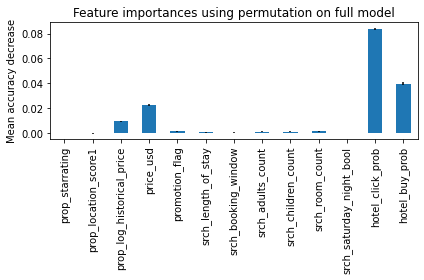

In [48]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [49]:
print(y_test)

[1 0 0 ... 1 1 0]


In [50]:
result = pd.DataFrame(y_test, columns=['actual'])
predicted= pd.DataFrame(y_pred, columns=['predicted'])

df = pd.DataFrame(X_test)



In [51]:
df['result'] = result
df['perdicted'] = predicted

In [54]:
df.to_csv('results.csv') 

In [53]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,result,perdicted
0,3.0,0.69,4.87,109.00,0.0,1.0,17.0,1.0,0.0,1.0,1.0,0.133333,0.133333,1,1
1,5.0,3.66,5.52,260.30,1.0,8.0,23.0,5.0,0.0,2.0,0.0,0.011117,0.006115,0,0
2,3.0,2.56,4.58,105.00,0.0,1.0,4.0,2.0,0.0,2.0,0.0,0.000000,0.000000,0,0
3,3.0,5.42,5.05,96.81,0.0,1.0,25.0,2.0,0.0,1.0,1.0,0.075862,0.034483,1,1
4,4.0,2.40,4.90,110.00,1.0,2.0,8.0,1.0,0.0,1.0,0.0,0.057692,0.057692,1,1
